# Spotify and Youtube data

In [1]:
!pip install imblearn==0.0

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing below listed libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing modules and classes from libraries. 
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier



### Data Preparation

In [3]:
# Saving csv-file containing dataset into variable "df".
df = pd.read_csv("Spotify_Youtube.csv")

# Dispalying the dataframe. 
df

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [4]:
# Finding null values and data type
null_counts = df.isnull().sum()
data_types = df.dtypes

for column in df.columns:
    print("Feature:", column)
    print("Null Values:", null_counts[column])
    print("Data Type:", data_types[column])
    print()


Feature: Unnamed: 0
Null Values: 0
Data Type: int64

Feature: Artist
Null Values: 0
Data Type: object

Feature: Url_spotify
Null Values: 0
Data Type: object

Feature: Track
Null Values: 0
Data Type: object

Feature: Album
Null Values: 0
Data Type: object

Feature: Album_type
Null Values: 0
Data Type: object

Feature: Uri
Null Values: 0
Data Type: object

Feature: Danceability
Null Values: 2
Data Type: float64

Feature: Energy
Null Values: 2
Data Type: float64

Feature: Key
Null Values: 2
Data Type: float64

Feature: Loudness
Null Values: 2
Data Type: float64

Feature: Speechiness
Null Values: 2
Data Type: float64

Feature: Acousticness
Null Values: 2
Data Type: float64

Feature: Instrumentalness
Null Values: 2
Data Type: float64

Feature: Liveness
Null Values: 2
Data Type: float64

Feature: Valence
Null Values: 2
Data Type: float64

Feature: Tempo
Null Values: 2
Data Type: float64

Feature: Duration_ms
Null Values: 2
Data Type: float64

Feature: Url_youtube
Null Values: 470
Data Type: 

### Dropping irrelevant columns

In [5]:
# Dropping irrelevant columns but keeping "Uri" as this will be used as unique identifier to check for duplicates
df_clean = df.drop(["Unnamed: 0", "Url_spotify", "Artist", "Album_type", "Album", "Track", "Url_youtube",
"Title", "Channel", "Views", "Likes", "Comments", "Description", "Licensed", "official_video"], axis=1)

# Displaying the cleaned data frame
df_clean

,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09
1,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08
2,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07
3,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08
4,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06
20714,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07
20715,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06
20716,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06


### Dropping null values and duplicates

In [6]:
# Selecting "Uri" column and searching for duplicates.
df_clean[df_clean["Uri"].duplicated()]

,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
155,spotify:track:0YJW8OXw8G1xDfkzaID3vv,0.831,0.868,11.0,-5.282,0.0325,0.17600,0.000000,0.1840,0.483,131.971,194438.0,1.626858e+08
248,spotify:track:1T4tQ4SSagbhAKpvcWg035,0.742,0.617,2.0,-6.689,0.0345,0.05000,0.000059,0.0711,0.491,147.002,124188.0,6.273677e+07
296,spotify:track:2yEHX6MqAXPyD7bm47A2Br,0.660,0.942,4.0,-2.273,0.1850,0.00789,0.000018,0.8340,0.543,126.017,158571.0,2.790850e+07
312,spotify:track:5sNESr6pQfIhL3krM8CtZn,0.687,0.793,2.0,-4.254,0.1660,0.06030,0.000000,0.5820,0.751,107.045,205733.0,7.788802e+08
333,spotify:track:4Li2WHPkuyCdtmokzW2007,0.789,0.858,1.0,-5.542,0.3110,0.12700,0.000000,0.3490,0.775,140.022,219333.0,1.054471e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20672,spotify:track:6Um358vY92UBv5DloTRX9L,0.491,0.643,10.0,-4.309,0.0442,0.18700,0.000000,0.1090,0.779,162.469,169419.0,7.711181e+07
20673,spotify:track:0IKeDy5bT9G0bA7ZixRT4A,0.529,0.602,7.0,-4.629,0.0458,0.29900,0.000000,0.0716,0.756,157.643,271862.0,7.948799e+07
20675,spotify:track:1O0IFR3MYqgQbziKTCf0X4,0.641,0.517,0.0,-5.472,0.0673,0.52800,0.000000,0.1360,0.642,127.902,175424.0,2.399872e+07
20682,spotify:track:1RDvyOk4WtPCtoqciJwVn8,0.710,0.879,0.0,-4.218,0.0422,0.15800,0.001420,0.4390,0.341,114.993,201391.0,NaN


In [7]:
# Example of Uri duplicates.
df_clean[df_clean['Uri']=='spotify:track:0YJW8OXw8G1xDfkzaID3vv']

,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
91,spotify:track:0YJW8OXw8G1xDfkzaID3vv,0.831,0.868,11.0,-5.282,0.0325,0.176,0.0,0.184,0.483,131.971,194438.0,162685755.0
155,spotify:track:0YJW8OXw8G1xDfkzaID3vv,0.831,0.868,11.0,-5.282,0.0325,0.176,0.0,0.184,0.483,131.971,194438.0,162685755.0
8029,spotify:track:0YJW8OXw8G1xDfkzaID3vv,0.831,0.868,11.0,-5.282,0.0325,0.176,0.0,0.184,0.483,131.971,194438.0,162685755.0


In [8]:
# Additional example of Uri duplicates.
df_clean[df_clean['Uri']=='spotify:track:1T4tQ4SSagbhAKpvcWg035']

,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
169,spotify:track:1T4tQ4SSagbhAKpvcWg035,0.742,0.617,2.0,-6.689,0.0345,0.05,0.000059,0.0711,0.491,147.002,124188.0,62736773.0
248,spotify:track:1T4tQ4SSagbhAKpvcWg035,0.742,0.617,2.0,-6.689,0.0345,0.05,0.000059,0.0711,0.491,147.002,124188.0,62736773.0


In [9]:
# Count the number of duplicates in df_clean
num_duplicates = df_clean.duplicated().sum()

# Print the result
print("Number of duplicates:", num_duplicates)

Number of duplicates: 1674


In [10]:
# Removing all null values and duplicates
df_tune = df_clean.dropna().drop_duplicates(subset=["Uri"], keep="first")

# Removing the "Uri" feature for the final dataset "df_tune"
df_tune = df_tune.drop("Uri", axis=1)

# Displaying the final data frame.
df_tune

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06


In [11]:
# Calculate the percentage of data entries removed
percent_removed = (1 - len(df_tune) / len(df)) * 100
percent_removed = round(percent_removed, 2)
print("After cleaning the dataset,", percent_removed, "percent of the data entries have been removed")

After cleaning the dataset, 11.58 percent of the data entries have been removed


In [12]:
print(len(df))

20718


### Adding a "Hit" column

In [13]:
# Add a "Hit" column for binary classification based on stream numbers
# If stream > 100,000,000 streams = 1
df_tune["Hit"] = df_tune["Stream"].apply(lambda x: 1 if x > 100000000 else 0)

# Displaying the dataframe
df_tune

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream,Hit
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09,1
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08,1
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07,0
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08,1
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06,0
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07,0
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06,0
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06,0


In [14]:
# Displaying the dataframe
df_tune

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream,Hit
0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,1.040235e+09,1
1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,3.100837e+08,1
2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,6.306347e+07,0
3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,4.346636e+08,1
4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,6.172597e+08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,9.227144e+06,0
20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,1.089818e+07,0
20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,6.226110e+06,0
20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6.873961e+06,0


In [15]:
df_tune["Hit"].value_counts()

0    12535
1     5783
Name: Hit, dtype: int64

## Data exploration

### Correlation between features

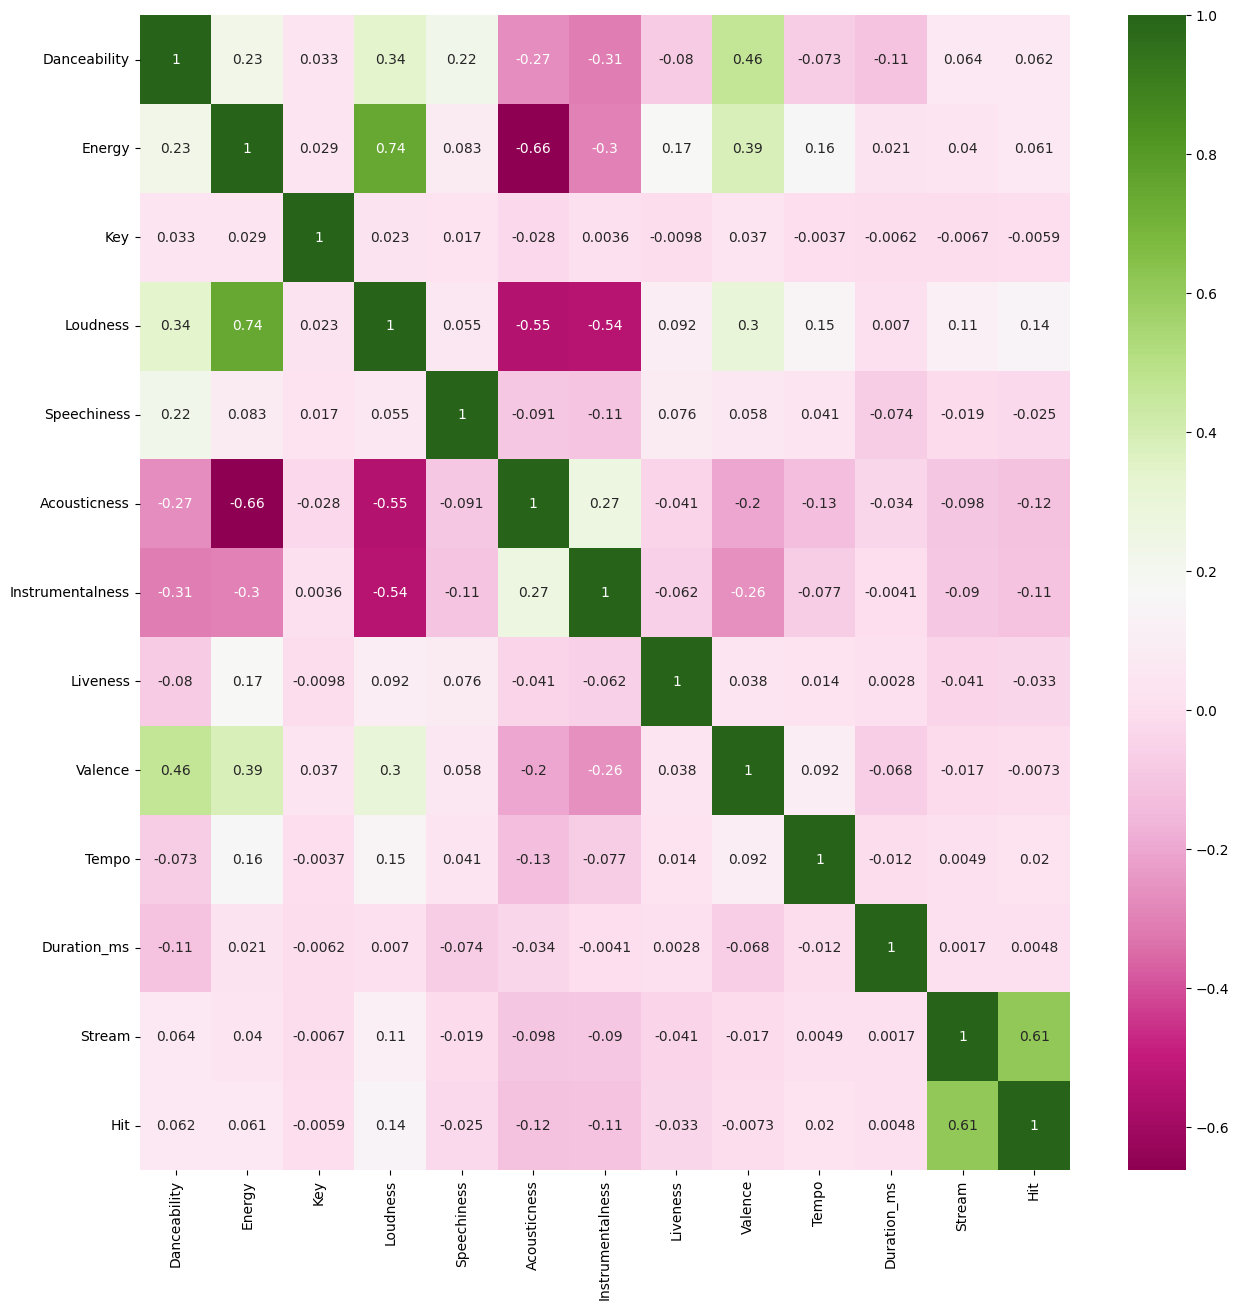

In [16]:
# Computing pairwise correlation of columns and saving it into variable "df_corr".
df_corr = df_tune.corr()

# Creating a a square-shaped figure.
fig, ax = plt.subplots(figsize=(15, 15))

# Generating the heatmap on the basis of "df_corr".
sns.heatmap(df_corr, annot=True, cmap='PiYG', ax=ax)

# Displaying the heatmap.
plt.show()

The heatmap shows there is a positive correlation between the features: stream, comments, likes, and views meaning when one goes up, the other follows. This was also to be expected since a popular song on Spotify is more likely to be popular on YouTube and vice versa. As this was to be expected (data leak??), we excluded them from counting as influential features.


### Most and least important features

In [17]:
# Calculating the correlation matrix of dataframe "df_tune" without column "Stream".
df_no_stream_corr = df_tune.drop(columns=["Stream"]).corr()

# Sorting the correlation values in descending order.
df_no_stream_corr_sorted = df_no_stream_corr.iloc[:-1,-1].abs().sort_values(ascending=False)

# Print the most and least important features with three decimals.
print("Most important features:")
print(df_no_stream_corr_sorted.head().round(3))
print("\nLeast important features:")
print(df_no_stream_corr_sorted.tail().round(3))


Most important features:
Loudness            0.137
Acousticness        0.117
Instrumentalness    0.112
Danceability        0.062
Energy              0.061
Name: Hit, dtype: float64

Least important features:
Speechiness    0.025
Tempo          0.020
Valence        0.007
Key            0.006
Duration_ms    0.005
Name: Hit, dtype: float64


According to the heatmap and the code above, none of the features seem to influence the number of streams strongly. Although the feature “Loudness” has a correlation of 0.12. As the heatmap contains many features, it can become overcrowded, making it difficult to interpret the data and identify patterns. Because of that, we used a code to find the features with the largest influence on the number of streams. The result shows that the most important features in descending order are: “Loudness”, “Acousticness”, “Instrumentalness”, “Danceability”, and “Energy”.

### Distribution of hits

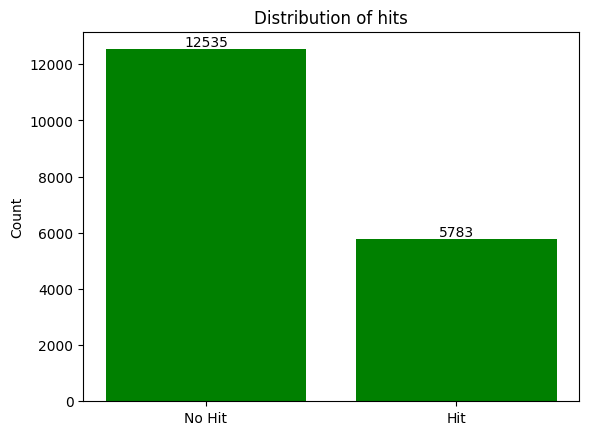

In [18]:
# Calculating the frequincies of "Hit" and "No hit".
value_counts = df_tune["Hit"].value_counts()

# Creating a bar plot.
plt.bar(value_counts.index, value_counts.values, color="Green")

# Adding labels and title to the bar plot.
plt.ylabel("Count")
plt.title("Distribution of hits")

# Customizing x-axis labels.
plt.xticks(value_counts.index, ["No Hit", "Hit"])

# Displaying the frequincies on top of the bars.
for i, v in enumerate(value_counts.values):
    plt.text(i, v, str(v), ha="center", va="bottom")

# Displaying the bar chart.
plt.show()


In [19]:
# Calculating the mean of the "Stream" column.
mean = df_tune['Stream'].mean()

print("Mean value of the 'Stream' column: ", mean)

Mean value of the 'Stream' column:  131748886.92837647


In [20]:
# Calculating the median of the "Stream" column.
median = df_tune['Stream'].median()

print("Median value of the 'Stream' column: ", median)

Median value of the 'Stream' column:  48633246.0


In [21]:
# Determining the lowest value of the "Stream" column.
lowest_value = df_tune['Stream'].min()

# Determining the highest value of the "Stream" column.
highest_value = df_tune['Stream'].max()

print("Lowest value:", lowest_value)
print("Highest value:", highest_value)

Lowest value: 6574.0
Highest value: 3386520288.0


### Scatterplots of the most influential features

We use scatterplots to examine further the correlations found in the heatmap. We also use scatterplots to identify relationships and patterns between some of the influential variables. The position of each point represents the value for the chosen two variables. The pattern of the scatterplot can give an idea of the strength of the relationship between two variables. 
The direction of the relationship is indicated by the slope of the line/curve, while the scatter shows the strength of the relationship around the line or curve.


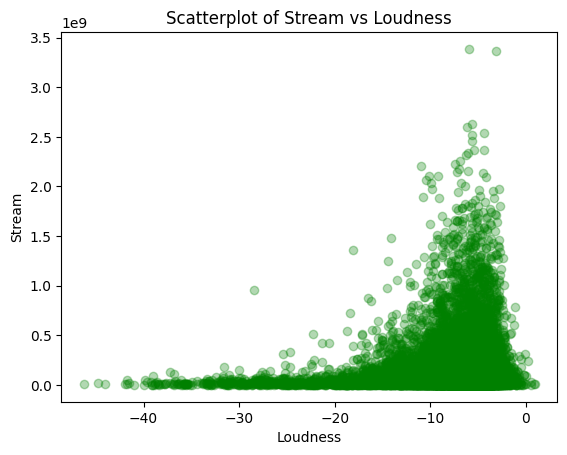

In [22]:
# Creating a scatterplot with the features "Loudness" and "Stream".
plt.scatter(df_tune["Loudness"], df_tune["Stream"], color = "green", alpha = 0.3)

# Adding title, x- and y-axes labels.
plt.title("Scatterplot of Stream vs Loudness")
plt.xlabel("Loudness")
plt.ylabel("Stream")

# Displaying the plot.
plt.show()

The points indicate that values close to 0 results in more likes, which complies with the positive correlation in the heatmap. Is anything important to note??

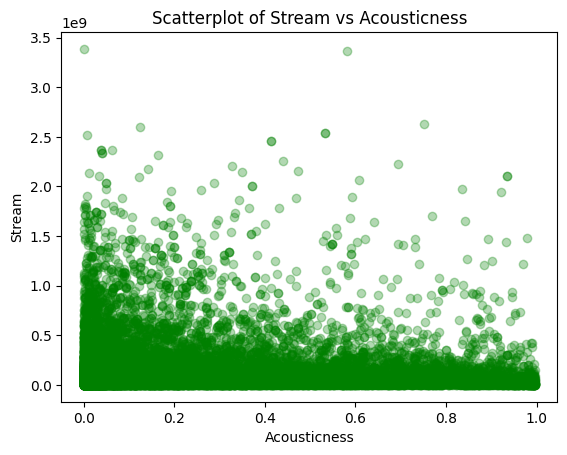

In [23]:
# Creating a scatterplot with the features "Acousticness" and "Stream".
plt.scatter(df["Acousticness"], df["Stream"], color = "green", alpha = 0.3)

# Adding title, x- and y-axes labels.
plt.title("Scatterplot of Stream vs Acousticness")
plt.xlabel("Acousticness")
plt.ylabel("Stream")

# Displaying the plot.
plt.show()

The points on the graph are scattered more randomly than the previous one. Although there seems to be a trend/pattern showing that number of likes goes up as the “Acousticness” decreases. This complies with the negative correlation between the two features shown in the heatmap.
-	Randomly distributed points suggest the absence of a relationship between two variables.

## Data Modelling

### Create data split

In [24]:
# Splitting the data into data(X) and target(y).
X = df_tune.drop('Hit', axis=1).drop("Stream", axis=1)
y = df_tune['Hit']

print("X has shape", X.shape)
print("y has shape", y.shape)

X has shape (18318, 11)
y has shape (18318,)


In [25]:
# Splitting data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Size of the training set.
print("Number of instances in the training set: ", len(X_train))
print("Number of target labels in the training set: ", len(y_train))

# Size of the test set.
print("\nNumber of instances in the test set: ", len(X_test))
print("Number of target labels in the test set: ", len(y_test))

Number of instances in the training set:  14654
Number of target labels in the training set:  14654

Number of instances in the test set:  3664
Number of target labels in the test set:  3664


### StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler

datascaled = StandardScaler().fit(X_train)
X_train = datascaled.fit_transform(X_train)
X_test = datascaled.fit_transform(X_test)

### Distribution of hits

In [27]:
y_train.value_counts(normalize=True)

0    0.684318
1    0.315682
Name: Hit, dtype: float64

### Model 1 - Dummy Classifier

In [28]:
# Creating instance of DummyClassifier and saving into variable "dummy_clf".
dummy_clf = DummyClassifier(strategy="stratified",random_state=42)

# Training the "dummy_clf" model on the training set.
dummy_clf.fit(X_train, y_train)

# Utilizing the model to predict the class labels for the train and test set.
dummy_pred_train = dummy_clf.predict(X_train)
dummy_pred_test = dummy_clf.predict(X_test)


In [29]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, dummy_pred_train)
test_accuracy = accuracy_score(y_test, dummy_pred_test)

print('Accuracy on training set: {:.3f}'.format(train_accuracy))
print('Accuracy on test set: {:.3f}\n'.format(test_accuracy))


# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, dummy_pred_train)
test_recall = recall_score(y_test, dummy_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, dummy_pred_train)
test_precision = precision_score(y_test, dummy_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, dummy_pred_train)
test_f1 = f1_score(y_test, dummy_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))


Accuracy on training set: 0.577
Accuracy on test set: 0.573

Recall on training set: 0.320
Recall on test set: 0.322

Precision on training set: 0.326
Precision on test set: 0.323

F1 score on training set: 0.323
F1 score on test set: 0.322



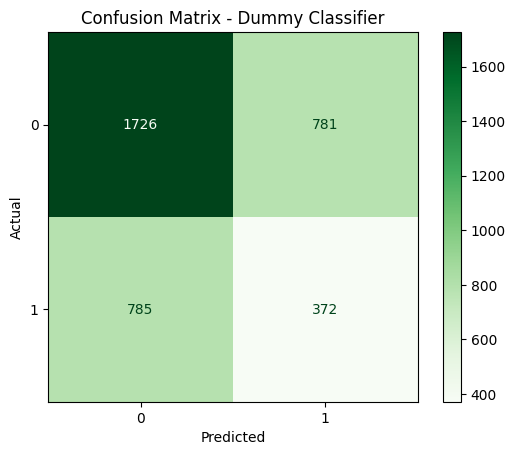

In [30]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
dummy_confusion = confusion_matrix(y_test, dummy_pred_test)

# Creating the confusion matrix display and saving it into variable "dummy_cm_display".
dummy_cm_display = ConfusionMatrixDisplay(confusion_matrix=dummy_confusion)

# Plotting the confusion matrix.
dummy_cm_display.plot(cmap='Greens')

# Adding labels and title to the plot.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Dummy Classifier')

# Displaying the plot.
plt.show()

If we didn't use the stratified strategy, the dummy would predict 0 FP  and 0 TP as it would only look at the majority class (Non hits). Using the stratified strategy will help balance the dataset and create false instances, which also is why it won't make that good predictions of hits.

In [31]:
y_train.value_counts(normalize=True)

0    0.684318
1    0.315682
Name: Hit, dtype: float64

### Model 2 - KNN

In [32]:
# Creating instance of KNeighborsClassifier and saving into variable "knn".
knn = KNeighborsClassifier()

# Training the KNeighborsClassifier model on the training set.
knn.fit(X_train, y_train)

# Utilizing the model to make predictions on the training set and test set.
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)


In [33]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, knn_pred_train)
test_accuracy = accuracy_score(y_test, knn_pred_test)

print('Accuracy on training set: {:.3f}'.format(train_accuracy))
print('Accuracy on test set: {:.3f}\n'.format(test_accuracy))


# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, knn_pred_train)
test_recall = recall_score(y_test, knn_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, knn_pred_train)
test_precision = precision_score(y_test, knn_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, knn_pred_train)
test_f1 = f1_score(y_test, knn_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))


Accuracy on training set: 0.750
Accuracy on test set: 0.635

Recall on training set: 0.449
Recall on test set: 0.280

Precision on training set: 0.651
Precision on test set: 0.392

F1 score on training set: 0.531
F1 score on test set: 0.327



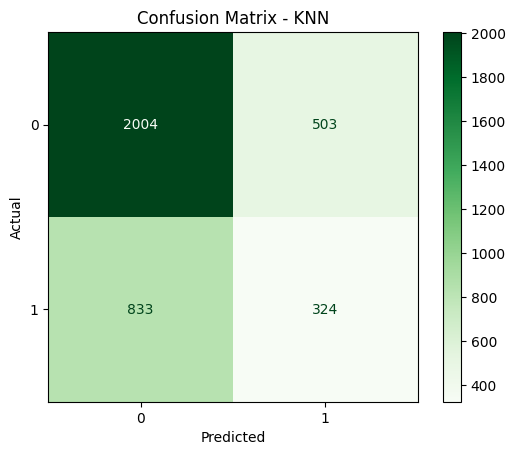

In [34]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
KNN_confusion = confusion_matrix(y_test, knn_pred_test)

# Creating the confusion matrix display and saving into variable "cm_display".
cm_display = ConfusionMatrixDisplay(confusion_matrix=KNN_confusion)

# Plotting the confusion matrix.
cm_display.plot(cmap='Greens')

# Adding labels and title to the plot.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')

# Displaying the plot.
plt.show()

Train    Test    n_neighbors
1.0000   0.6029  1   
0.7500   0.6354  5   
0.7329   0.6520  7   
0.7120   0.6719  10   
0.7097   0.6777  12   
0.7070   0.6648  15   
0.6956   0.6717  20   


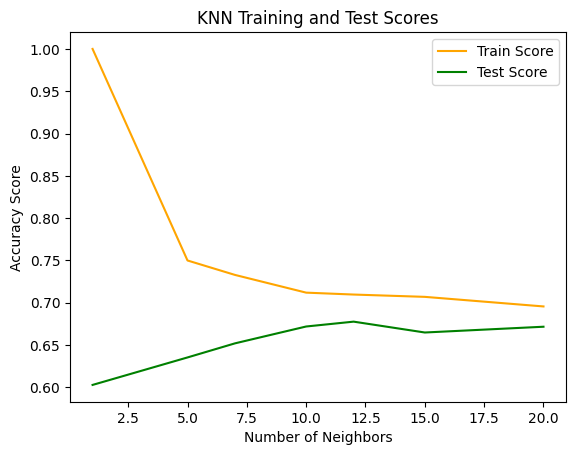

In [35]:
import matplotlib.pyplot as plt

# Testing different KNN neighbors by comparing accuracy score on test and train set.
knn_train_scores = []
knn_test_scores = []
neighbors = [1, 5, 7, 10, 12, 15, 20]

# Creating a loop and calculating different accuracy scores based on "n_neighbors" integer.
print("Train    Test    n_neighbors")
for d in neighbors:
    knntries = KNeighborsClassifier(n_neighbors=d, weights="uniform").fit(X_train, y_train)
    
    knn_train = knntries.score(X_train, y_train)
    knn_train_scores.append(knn_train)
    
    knn_test = knntries.score(X_test, y_test)   
    knn_test_scores.append(knn_test)

    print("{:.4f}   {:.4f}  {}   ".format(knn_train, knn_test, d))

# Creating line chart
plt.plot(neighbors, knn_train_scores, label='Train Score', color='orange')
plt.plot(neighbors, knn_test_scores, label='Test Score', color='green')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('KNN Training and Test Scores')
plt.legend()
plt.show()


### Model 2 - KNN (tuned)

In [36]:
# Creating an instance of KNeighborsClassifier with tuned parameters n_neighbors and weights
# and saving into variable "knn_tuned".
knn_tuned = KNeighborsClassifier(n_neighbors = 12, weights ="uniform")

# Training the model on the training set.
knn_tuned.fit(X_train, y_train)

# Utilizing the model to make predictions on the training set and test set.
knn_tuned_pred_train = knn_tuned.predict(X_train)
knn_tuned_pred_test = knn_tuned.predict(X_test)


In [37]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, knn_tuned_pred_train)
test_accuracy = accuracy_score(y_test, knn_tuned_pred_test)

print('Accuracy on training set: {:.3f}'.format(train_accuracy))
print('Accuracy on test set: {:.3f}\n'.format(test_accuracy))


# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, knn_tuned_pred_train)
test_recall = recall_score(y_test, knn_tuned_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, knn_tuned_pred_train)
test_precision = precision_score(y_test, knn_tuned_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, knn_tuned_pred_train)
test_f1 = f1_score(y_test, knn_tuned_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))


Accuracy on training set: 0.710
Accuracy on test set: 0.678

Recall on training set: 0.197
Recall on test set: 0.145

Precision on training set: 0.628
Precision on test set: 0.467

F1 score on training set: 0.300
F1 score on test set: 0.221



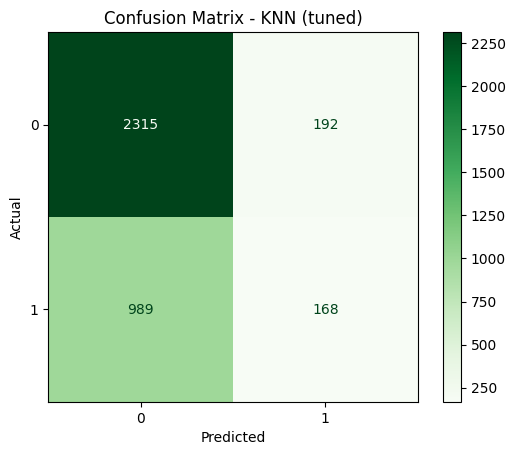

In [38]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
KNN_confusion_tuned = confusion_matrix(y_test, knn_tuned_pred_test)

# Creating the confusion matrix display and saving into variable "cm_tuned_display".
cm_tuned_display = ConfusionMatrixDisplay(confusion_matrix=KNN_confusion_tuned)

# Plotting the confusion matrix.
cm_tuned_display.plot(cmap='Greens')

# Adding labels and title to the plot.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN (tuned)')

# Displaying the plot.
plt.show()

Training set shows overfitting, but tuning helps the accuracy on the test set

### Model 3 - Decision Tree

Train    Test    max_depth
0.6843   0.6842    1   
0.6843   0.6842    2   
0.6843   0.6842    3   
0.6847   0.6826    4   
0.6851   0.6809    5   
0.6873   0.6785    6   
0.6932   0.6788    7   
0.7011   0.6725    8   
0.7125   0.6490    9   
0.7244   0.6586    10   
0.7645   0.6245    12   
0.8371   0.6097    15   


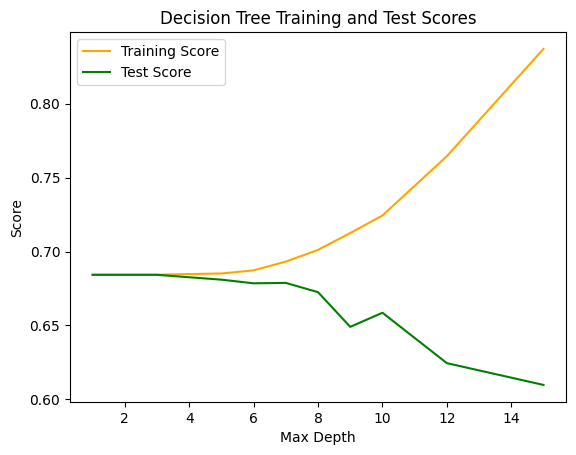

In [39]:
import matplotlib.pyplot as plt

# Creating lists for max_depth values, training scores, and test scores
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15]
dt_train_scores = []
dt_test_scores = []

print("Train    Test    max_depth")
for d in max_depths:
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=d).fit(X_train, y_train)
            
    dt_train = dt_model.score(X_train, y_train)
    dt_train_scores.append(dt_train)
    
    dt_test = dt_model.score(X_test, y_test)   
    dt_test_scores.append(dt_test)

    print("{:.4f}   {:.4f}    {}   ".format(dt_train, dt_test, d))

# Creating the line chart
plt.plot(max_depths, dt_train_scores, label='Training Score', color='orange')
plt.plot(max_depths, dt_test_scores, label='Test Score', color='green')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Decision Tree Training and Test Scores')
plt.legend()

# Displaying the line chart
plt.show()



In [40]:
# Creating an instance of DecisionTreeClassifier and saving into variable "dt".
dt = DecisionTreeClassifier(max_depth=9, random_state=42)

# Training the decision tree model on the training set.
dt.fit(X_train, y_train)

# Using the model to make predictions on the training set and test set.
dt_pred_train = dt.predict(X_train)
dt_pred_test = dt.predict(X_test)

# Visualizing the decision tree.
#plt.figure(figsize=(20,10))
#plot_tree(dt, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
#plt.show()

In [41]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, dt_pred_train)
test_accuracy = accuracy_score(y_test, dt_pred_test)

print('Accuracy on training set: {:.3f}'.format(train_accuracy))
print('Accuracy on test set: {:.3f}\n'.format(test_accuracy))


# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, dt_pred_train)
test_recall = recall_score(y_test, dt_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, dt_pred_train)
test_precision = precision_score(y_test, dt_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, dt_pred_train)
test_f1 = f1_score(y_test, dt_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))


Accuracy on training set: 0.713
Accuracy on test set: 0.649

Recall on training set: 0.224
Recall on test set: 0.232

Precision on training set: 0.625
Precision on test set: 0.403

F1 score on training set: 0.329
F1 score on test set: 0.295



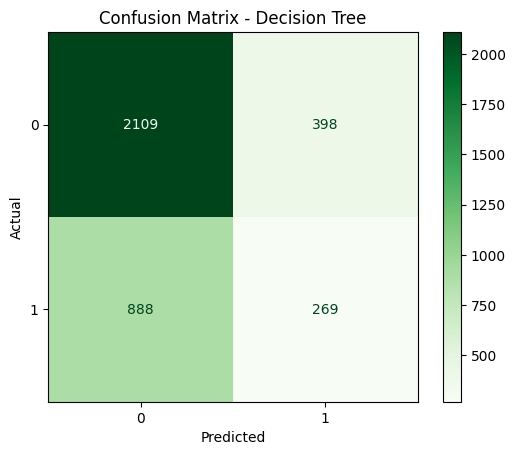

In [42]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
dt_confusion = confusion_matrix(y_test, dt_pred_test)

# Creating the confusion matrix display and saving into variable "dt_display".
dt_display = ConfusionMatrixDisplay(confusion_matrix=dt_confusion)

# Plotting the confusion matrix.
dt_display.plot(cmap='Greens')

# Adding labels and title to the decision tree confusion matrix.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')

# Displaying the plot.
plt.show()

Finding best most accurate max depth

### Model 3 - Decision Tree (Delete)

In [43]:
# Creating an instance of DecisionTreeClassifier with tuned parameter "max_depth" 
# and saving into variable "dt_tuned".
dt_tuned = DecisionTreeClassifier(random_state=42, max_depth=15)

# Training the tuned decision tree model on the training set.
dt_tuned.fit(X_train, y_train)

# Using the tuned model to make predictions on the training set and test set.
dt_tuned_pred_train = dt_tuned.predict(X_train)
dt_tuned_pred_test = dt_tuned.predict(X_test)

# Visualizing the decision tree.
#plt.figure(figsize=(20,10))
# plot_tree(dt_tuned, feature_names=X.columns, class_names=y.unique().astype(str), filled=True)
#plt.show()

In [44]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, dt_tuned_pred_train)
test_accuracy = accuracy_score(y_test, dt_tuned_pred_test)

print('Accuracy on training set: {:.3f}'.format(train_accuracy))
print('Accuracy on test set: {:.3f}\n'.format(test_accuracy))


# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, dt_tuned_pred_train)
test_recall = recall_score(y_test, dt_tuned_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, dt_tuned_pred_train)
test_precision = precision_score(y_test, dt_tuned_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, dt_tuned_pred_train)
test_f1 = f1_score(y_test, dt_tuned_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on training set: 0.837
Accuracy on test set: 0.610

Recall on training set: 0.599
Recall on test set: 0.275

Precision on training set: 0.839
Precision on test set: 0.350

F1 score on training set: 0.699
F1 score on test set: 0.308



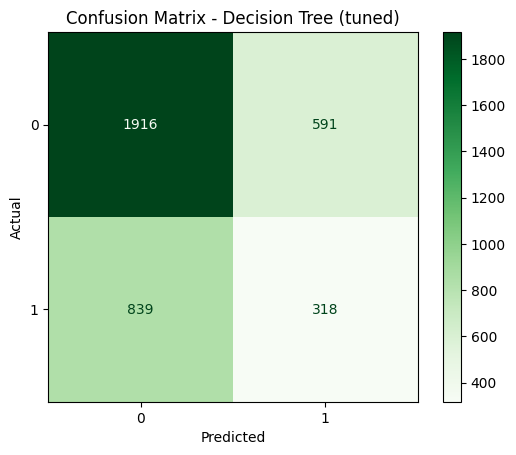

In [45]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
dt_confusion_tuned = confusion_matrix(y_test, dt_tuned_pred_test)

# Creating the confusion matrix display and saving into variable "dt_tuned_display".
dt_tuned_display = ConfusionMatrixDisplay(confusion_matrix=dt_confusion_tuned)

# Plotting the confusion matrix.
dt_tuned_display.plot(cmap='Greens')

# Adding labels and title to the confusion matrix.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (tuned)')

# Displaying the plot.
plt.show()

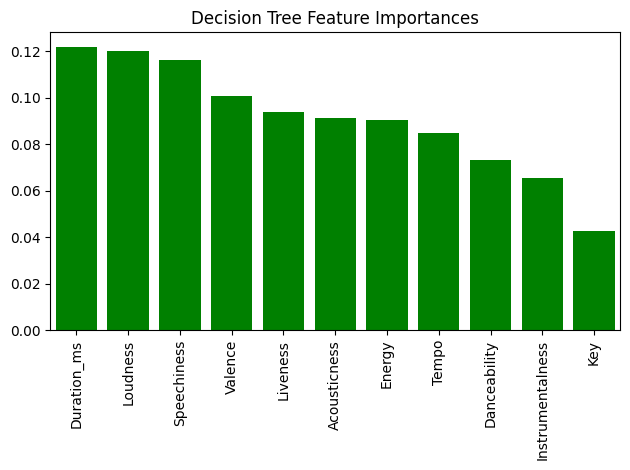

In [46]:
# Calculating the feature importance for the decision tree.
dt_importances = dt_tuned.feature_importances_

# Performing an index sorting operation on array "dt_importances" 
# and saving into variable "sorted_indices".
sorted_indices = np.argsort(dt_importances)[::-1]

# Creating bar chart and adding title and labels.
plt.title('Decision Tree Feature Importances')
plt.bar(range(X_train.shape[1]), dt_importances[sorted_indices],color="green")
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()

# Displaying the plot.
plt.xlim(-0.5, 10.5)
plt.show()


### Model 4 - Random forest

In [47]:
# Creating an instance of DecisionTreeClassifier and saving into variable "rfc".
rfc = RandomForestClassifier(n_estimators=1, random_state=42)

# Training the model on the training set.
rfc.fit(X_train, y_train)

# Making predictions on the training and test set.
rfc_pred_train = rfc.predict(X_train)
rfc_pred_test = rfc.predict(X_test)


In [48]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, rfc_pred_train)
test_accuracy = accuracy_score(y_test, rfc_pred_test)

print('Accuracy on training set: {:.3f}'.format(train_accuracy))
print('Accuracy on test set: {:.3f}\n'.format(test_accuracy))


# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, rfc_pred_train)
test_recall = recall_score(y_test, rfc_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, rfc_pred_train)
test_precision = precision_score(y_test, rfc_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, rfc_pred_train)
test_f1 = f1_score(y_test, rfc_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on training set: 0.844
Accuracy on test set: 0.560

Recall on training set: 0.767
Recall on test set: 0.373

Precision on training set: 0.746
Precision on test set: 0.328

F1 score on training set: 0.756
F1 score on test set: 0.349



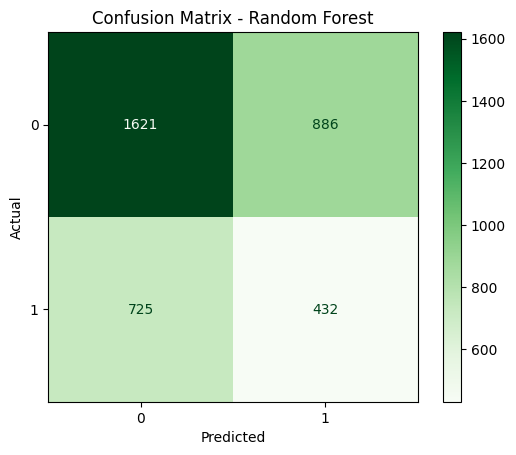

In [49]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
confusion = confusion_matrix(y_test, rfc_pred_test)

# Creating the confusion matrix display and saving into variable "cm_display".
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion)

# Plotting the confusion matrix.
cm_display.plot(cmap='Greens')

# Adding labels and title to the confusion matrix.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')

# Displaying the plot.
plt.show()


In [50]:
# Testing different Random Forest Tree "n_estimators" by comparing accuracy score on test and train set.
rfc_train_scores = []
rfc_test_scores = []

# Creating a loop and calculating different accuracy scores based on "n_estimators".
print("Train    Test    n_estimators")
for d in (1, 5, 10, 20, 100, 200, 300, 400):
    rfctries = RandomForestClassifier(n_estimators=d, random_state=42).fit(X_train, y_train)
            
    rfc_train = rfctries.score(X_train, y_train)
    rfc_train_scores.append(rfc_train)
    
    rfc_test = rfctries.score(X_test, y_test)   
    rfc_test_scores.append(rfc_test)

    print("{:.4f}   {:.4f}  {}   ".format(rfc_train, rfc_test, d))

Train    Test    n_estimators
0.8441   0.5603  1   
0.9575   0.6146  5   
0.9774   0.6594  10   
0.9954   0.6632  20   
1.0000   0.6796  100   
1.0000   0.6807  200   
1.0000   0.6831  300   
1.0000   0.6831  400   


### Random forest (tuned)

In [51]:
# Creating an instance of RandomForestClassifier with tuned parameters "n_estimators" and "random_state"
# and saving into variable "rfc_tuned".
rfc_tuned = RandomForestClassifier(n_estimators=300, random_state=42)

# Training the model on the training set.
rfc_tuned.fit(X_train, y_train)

# Making predictions on the training and test set.
rfc_tuned_pred_train = rfc_tuned.predict(X_train)
rfc_tuned_pred_test = rfc_tuned.predict(X_test)

In [52]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, rfc_tuned_pred_train)
test_accuracy = accuracy_score(y_test, rfc_tuned_pred_test)

print('Accuracy on training set: {:.3f}'.format(train_accuracy))
print('Accuracy on test set: {:.3f}\n'.format(test_accuracy))


# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, rfc_tuned_pred_train)
test_recall = recall_score(y_test, rfc_tuned_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, rfc_tuned_pred_train)
test_precision = precision_score(y_test, rfc_tuned_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, rfc_tuned_pred_train)
test_f1 = f1_score(y_test, rfc_tuned_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on training set: 1.000
Accuracy on test set: 0.683

Recall on training set: 1.000
Recall on test set: 0.108

Precision on training set: 1.000
Precision on test set: 0.492

F1 score on training set: 1.000
F1 score on test set: 0.177



The n_estimators is set to 200, indicating that the Random Forest will consist of 200 decision trees. random_state is set to 42 to ensure reproducibility with a specific random seed. You can adjust these values according to your needs and preferences.

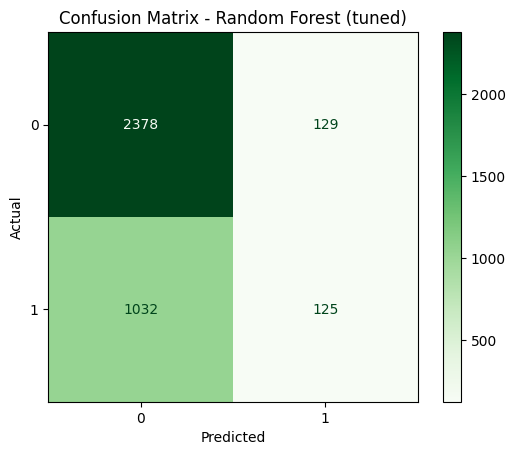

In [53]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
confusion = confusion_matrix(y_test, rfc_tuned_pred_test)

# Creating the confusion matrix display and saving into variable "cm_display".
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion)

# Plotting the confusion matrix.
cm_display.plot(cmap="Greens")

# Adding labels and title to the confusion matrix.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (tuned)')

# Displaying the plot.
plt.show()

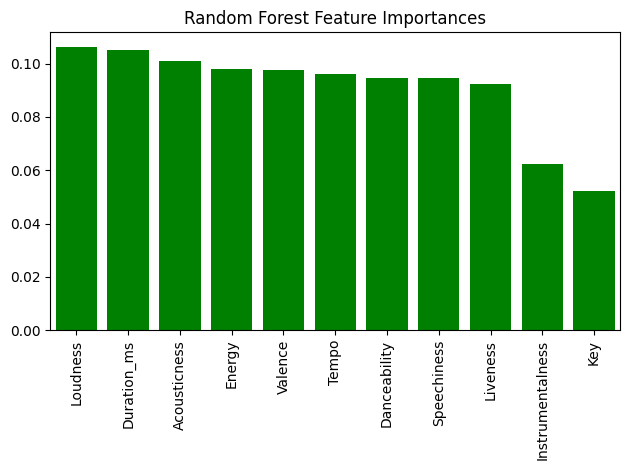

In [54]:
# Calculating the feature importance.
rfc_importances = rfc_tuned.feature_importances_
# Performing an index sorting operation on array "rfc_importances" 
# and saving into variable "sorted_indices".
sorted_indices = np.argsort(rfc_importances)[::-1]

# Creating bar chart and adding title and labels.
plt.title('Random Forest Feature Importances')
plt.bar(range(X_train.shape[1]), rfc_importances[sorted_indices], color="green")
plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()

# Displaying the Feature Importance plot.
plt.xlim(-0.5, 10.5)
plt.show()


### Model 5 - Logistic regression

In [55]:
# Creating a logistic regression classifier.
log = LogisticRegression()

# Training the model "log" on the training data.
log.fit(X_train, y_train)

# Utilizing the model to make predictions on the training set and test set.
log_pred_train = log.predict(X_train)
log_pred_test = log.predict(X_test)


In [56]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, log_pred_train)
test_accuracy = accuracy_score(y_test, log_pred_test)

print('Accuracy on the training set: {:.3f}'.format(log.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}\n'.format(log.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, log_pred_train)
test_recall = recall_score(y_test, log_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, log_pred_train)
test_precision = precision_score(y_test, log_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, log_pred_train)
test_f1 = f1_score(y_test, log_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on the training set: 0.685
Accuracy on test set: 0.685

Recall on training set: 0.010
Recall on test set: 0.011

Precision on training set: 0.568
Precision on test set: 0.565

F1 score on training set: 0.020
F1 score on test set: 0.022



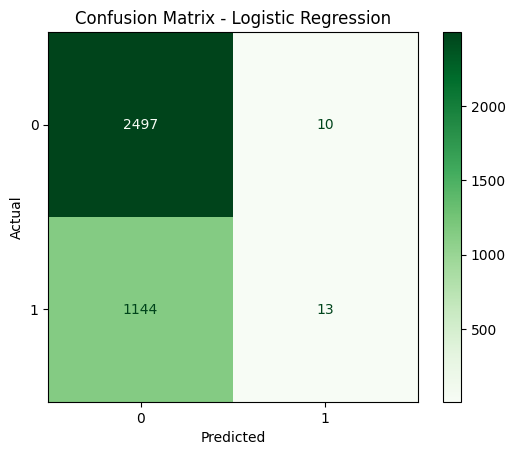

In [57]:
# Calculating the confusion matrix based on the predictions made by the trained model on test data.
confusion = confusion_matrix(y_test, log_pred_test)

# Creating the confusion matrix display and saving into variable "cm_display".
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion)

# Plotting the confusion matrix
cm_display.plot(cmap='Greens')

# Adding labels and title to the confusion matrix.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')

# Displaying the plot.
plt.show()

### Logistic regression (fixing underfitting test data)

In [58]:
# Create a logistic regression classifier with L1 regularization
log2 = LogisticRegression(penalty='l1', solver='liblinear',  random_state=42)

# Train the classifier on the training data
log2.fit(X_train, y_train)

# Utilizing the model to make predictions on the training set and test set.
log2_pred_train = log2.predict(X_train)
log2_pred_test = log2.predict(X_test)


In [59]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, log2_pred_train)
test_accuracy = accuracy_score(y_test, log2_pred_test)

print('Accuracy on the training set: {:.3f}'.format(log2.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}\n'.format(log2.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, log2_pred_train)
test_recall = recall_score(y_test, log2_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, log2_pred_train)
test_precision = precision_score(y_test, log2_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, log2_pred_train)
test_f1 = f1_score(y_test, log2_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on the training set: 0.685
Accuracy on test set: 0.685

Recall on training set: 0.010
Recall on test set: 0.011

Precision on training set: 0.571
Precision on test set: 0.565

F1 score on training set: 0.019
F1 score on test set: 0.022



In [60]:
# When the test accuracy is significantly higher than the training accuracy, it suggests a problem of underfitting

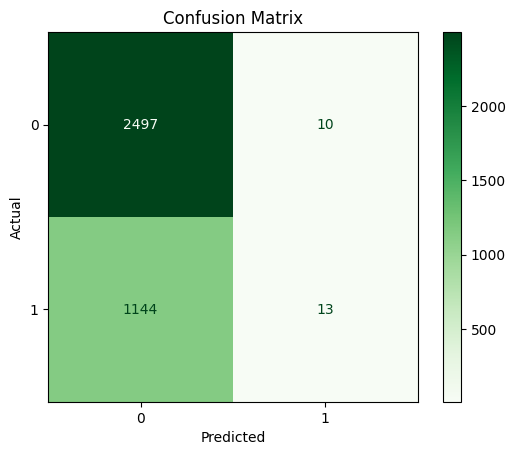

In [61]:
# Calculate confusion matrix
confusion = confusion_matrix(y_test, log2_pred_test)

# Create confusion matrix display
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion)

# Plot confusion matrix
cm_display.plot(cmap='Greens')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### Changing the c-value to minimize overfitting

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the C values to try
C_values = [0.01, 0.1, 1, 10, 100]

best_test_accuracy = 0.0
best_train_accuracy = 0.0
best_C = None

for C in C_values:
    # Create a logistic regression model with the current C value
    log3 = LogisticRegression(C=C, random_state=42)

    # Train the classifier on the training data
    log3.fit(X_train, y_train)

    # Make predictions on the test data
    log3_pred_test = log3.predict(X_test)
    log3_pred_train = log3.predict(X_train)

    # Calculate the accuracy of the model on the test set
    test_accuracy = accuracy_score(y_test, log3_pred_test)
    train_accuracy = accuracy_score(y_train, log3_pred_train)

    # Print the test accuracy for the current C value with three decimal places
    print("C =", C)
    print("Training Accuracy: {:.3f}".format(train_accuracy))
    print("Test Accuracy: {:.3f}".format(test_accuracy))
    print()

    # Check if the current C value has better test accuracy than the previous best accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_train_accuracy = train_accuracy
        best_C = C

# Print the best C value and its corresponding training and test accuracies
print("Best C Value:", best_C)
print("Best Training Accuracy: {:.3f}".format(best_train_accuracy))
print("Best Test Accuracy: {:.3f}".format(best_test_accuracy))

C = 0.01
Training Accuracy: 0.685
Test Accuracy: 0.685

C = 0.1
Training Accuracy: 0.685
Test Accuracy: 0.685

C = 1
Training Accuracy: 0.685
Test Accuracy: 0.685

C = 10
Training Accuracy: 0.685
Test Accuracy: 0.685

C = 100
Training Accuracy: 0.685
Test Accuracy: 0.685

Best C Value: 0.01
Best Training Accuracy: 0.685
Best Test Accuracy: 0.685


In [63]:
# Calculating the accuracy score for training set and test set.
train_accuracy = accuracy_score(y_train, log3_pred_train)
test_accuracy = accuracy_score(y_test, log3_pred_test)

print('Accuracy on the training set: {:.3f}'.format(log3.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}\n'.format(log3.score(X_test, y_test)))

# Calculating the recall score for training set and test set.
train_recall = recall_score(y_train, log3_pred_train)
test_recall = recall_score(y_test, log3_pred_test)

print('Recall on training set: {:.3f}'.format(train_recall))
print('Recall on test set: {:.3f}\n'.format(test_recall))


# Calculating the precision score for training set and test set.
train_precision = precision_score(y_train, log3_pred_train)
test_precision = precision_score(y_test, log3_pred_test)

print('Precision on training set: {:.3f}'.format(train_precision))
print('Precision on test set: {:.3f}\n'.format(test_precision))


# Calculating the F1 score for training set and test set.
train_f1 = f1_score(y_train, log3_pred_train)
test_f1 = f1_score(y_test, log3_pred_test)

print('F1 score on training set: {:.3f}'.format(train_f1))
print('F1 score on test set: {:.3f}\n'.format(test_f1))

Accuracy on the training set: 0.685
Accuracy on test set: 0.685

Recall on training set: 0.010
Recall on test set: 0.011

Precision on training set: 0.568
Precision on test set: 0.565

F1 score on training set: 0.020
F1 score on test set: 0.022



### Confusion matrix for logistic regression (after fixing underfitting test data)

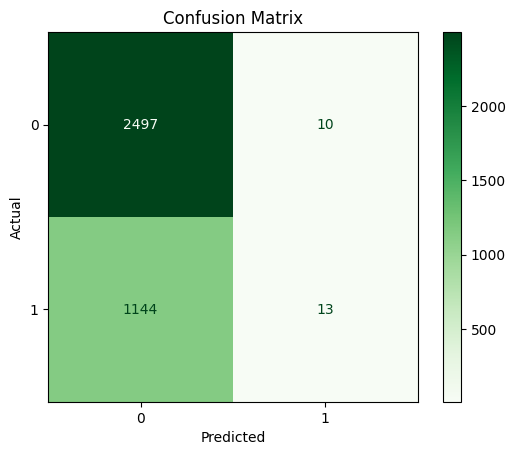

In [64]:
# Create a logistic regression classifier with the best C value
best_clf = LogisticRegression(C=best_C, random_state=42)

# Train the classifier on the training data
best_clf.fit(X_train, y_train)

# Make predictions on the test data
clf_pred3 = best_clf.predict(X_test)

# Create a confusion matrix
logconfusion = confusion_matrix(y_test, log3_pred_test)

# Create confusion matrix display
logcm_display = ConfusionMatrixDisplay(confusion_matrix=logconfusion)

# Plot confusion matrix
logcm_display.plot(cmap='Greens')

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6e34955-6085-427a-b0e5-2e5b71489469' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>